## Question 1 and 2:
I did the question 2 first since I needed its results to be used for the answer of Q1. 
Firstly, I want to make a questions profile table:


In [62]:
conda remove matplotlib

Solving environment: failed

PackagesNotFoundError: The following packages are missing from the target environment:
  - matplotlib



Note: you may need to restart the kernel to use updated packages.


In [64]:
conda install matplotlib

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kiwisolver-1.3.1           |   py37h23ab428_0          52 KB
    matplotlib-3.4.3           |   py37hecd8cb5_0          28 KB
    matplotlib-base-3.4.3      |   py37h0a11d32_0         5.6 MB
    ------------------------------------------------------------
                                           Total:         5.6 MB

The following NEW packages will be INSTALLED:

  brotli             pkgs/main/osx-64::brotli-1.0.9-hb1e8313_2
  cycler             pkgs/main/osx-64::cycler-0.10.0-py37_0
  fonttools          pkgs/main/noarch::fonttools-4.25.0-pyhd3eb1b0_0
  kiwisolver         pkgs/main/osx-64::kiwisolver-1.3.1-py37h23ab428_0
  matplotlib         pkgs/main/osx-64::matplotlib-3.4.3-py37hecd8cb5_0
  matplotlib-base 

In [1]:
# Importing the required libraries 
import numpy as np
import pandas as pd
import csv
import os

In [65]:
import matplotlib.pyplot as plt

### Question 2:
#### What are the questions/items? Question ID, Question Type, Number of times being practiced, Number of times answered correctly
I read all of the aforementioned information for table 2, "answer" column means the number of answeres that is submitted for a certain question. C_answer means the number of correct answeres that is submitted for a certain question. I also difeined a "difficulty" column. It means for each question we calculate its dificulty level, and put in this coulmn. If "C_answer"/"answer" is more than 0.5 then, the difficulty level is 1, and the question is easy. If "C_answer"/"answer"< 0.5 then the question is hard or at least not easy (difficulty"=2)
#### Create a few plots to illustrate the information in the tables. Feel free to choose the type of plots you think is appropriate. 
Added.

### Table 2:

In [2]:
# Here, I just defined the headers of my table "table 2", and a csv file that will contain the information of table 2
# Q_ID means question ID
#Type : type of  question
#number_of_answers : the  number of  people who have answered this question 
#number_of_C_answers : number  people who have answered this question correctly
# difficulty: the  question difficulty  level
header = ['Q_ID','Type','number_of_answers','number_of_C_answers','difficulty']
with open('Final2.csv','w',encoding = 'UTF8',newline='') as f:
    writer = csv.writer(f)        
    writer.writerow(header)

In [3]:
# we juts get the user IDs which are the user folder names in a list called arr
#so,len(arr) means the number of  users
arr = os.listdir('KT4')
L = len (arr)

In [4]:
print(L)

297916


In [5]:
#  Then, we read the questions table in a csv file in a dataframe, but I converted it to numpy  array later since  it really
# helped  with  the speed! Numpy array "where" order made a  very time consuming  process fast!
# df_c provides us with the correct answer of each question
# we again converted it  to numpy array to be able to use "where" order which really helps with speed
df_c = pd.read_csv('contents/questions.csv')
array = df_c.to_numpy() 

In [6]:
print(df_c)

      question_id bundle_id explanation_id correct_answer  part  \
0              q1        b1             e1              b     1   
1              q2        b2             e2              a     1   
2              q3        b3             e3              b     1   
3              q4        b4             e4              b     1   
4              q5        b5             e5              c     1   
...           ...       ...            ...            ...   ...   
13164      q18139    b12202         e12202              b     2   
13165      q18140    b12203         e12203              a     2   
13166      q18141    b12204         e12204              a     2   
13167      q18142    b12205         e12205              a     2   
13168      q18143    b12206         e12206              c     2   

                   tags    deployed_at  
0           1;2;179;181  1558093217098  
1              15;2;182  1558093219720  
2          14;2;179;183  1558093222784  
3           9;2;179;184  155809

In [7]:
# two arrays are defined below. One of then "NUM" is for recieving the number of asnwers for each question
# the second array which is "Q_num" refers to the number of answers which are correct (for each question)

NUM = []
Q_num = []
# I gave 0 as all of the elements of the arrays. Then, we do have a predifined value for the elements which we can 
#update them. This makes us avoid from getting errors due to undifined elements of the arrays. So, if  an element of
#the arrays is not processed before we will not get an error for it.
Q_num[0:] = [0] * len(df_c) 
NUM[0:] = [0] * len(df_c) 

#correct array
# Two more arrays are defined "C_a" is used to get the correct answer of each question
# "C_ID" is an array to be used to get the question IDs
C_a = []
C_ID = []
par = [0] * len(df_c) 
for k in range (len(df_c)):
    C_a.append(df_c.loc[k]['correct_answer'])
    C_ID.append(df_c.loc[k]['question_id'])
    #par[k] = int(df_c.loc[k][0].strip('q'))
    par[k] = df_c.loc[k][0]

In [8]:
# we will continue to solve  the problem using some "for"
#Firstly, we need to read each user activites CSV file in a pandas datafarame
# then we convert the data frames into numpy arrays to be able to use "where" order 
# Due to lack of speed we perform the codes for 5000 users
#bUt with changing it to len(arr) or L we can do it for all of the users
for j in range (5000):
    

    df = pd.read_csv('KT4/'+arr[j])
    Arr = df.to_numpy() 
    
    res = ''
    q = ''
    Res = []
    Q_ID = []
    CHeck = ''
# we try to find the "respond" action to questions
# A user may have multiple respond to one  question because he/she can change his/her mind about the final answer
# we do not want to capture all of the "respond " actions
# We just need their final answer to see if it is correct or not, not the previous responds
# for solving this I found out that the last "respond" is followed by "submit"
#  We have two ways: 1, find the "respond"  actions which are followed by "submit" action
# Or get the last "respond" action info 
# The data demostrates that these two ways are the  same
# I go with the second  way:
# In the Res array we want to store the final "respond" actions
# we append in Res the final responds
# and in Q_ID array we store the question ID for the corresponding "respond" in Res ( using append)

# the code below captures  all "respond" actions for all of the users
    X,Y = np.where(Arr == 'respond')
    for B in range (len(X)) :
    # the if below says: if you get the row including "respond" action, and checked the question Id of it(which is [2])
    # and it is the same as the question ID for the next "respond" action
    #then it does not append it to Res, otherwise, it appends it to Res array
    # Before appending to Res and Q_ID we have CHeck array, if they are final answers they will go to Res and Q_ID
        if CHeck == Arr[X[B]][2] :
            Res[len(Res)-1] = Arr[X[B]][5]
        else :
            Res.append(Arr[X[B]][5])
            Q_ID.append(Arr[X[B]][2])
        CHeck = Arr[X[B]][2]
    num = 0
    for p in range (len(Q_ID)):
        
        #x = df_c.loc[int(Q_ID[p].strip('q'))][0].strip('q')
        #x = Q_ID[p].strip('q')
        xx = par.index(Q_ID[p]) 
        NUM[xx] += 1
        v = C_ID.index(Q_ID[p])
        if Res[p] == C_a[v] :
            Q_num[v] += 1
        # for p in Q_ID which is the Question IDs which are responed.
# par array had the question IDs for all of the questions
#index checks all of the responds for each question,  and stores it in xx variable
#  NUM[xx] gets one (counting the final responds for each question)
# v variable checks the correct answer. If the respond  (Res[p]) is the same as the correct answer (C_a[v])
# then it adds one to Q_num which stores  the number of correct answers
     

In [9]:
# Finally, we have to arrays :
# Num that stores the number of answers
# Q_num that stores the number of correct answers
for m in range (len(df_c)):
    
    M = m+1
    Tab = ['q'+ str(M),'N/A',NUM[m],Q_num[m]]
    with open('Final2.csv','a',encoding = 'UTF8',newline='') as f:
        writer = csv.writer(f)        
        writer.writerow(Tab)    


In [98]:
table2 = pd.read_csv('Final2.csv')
print(table2)

         Q_ID  Type  answer  C_answer  difficulty
0          q1   NaN    1598      1408         1.0
1          q2   NaN    1519      1294         1.0
2          q3   NaN   13835      7423         1.0
3          q4   NaN    5086      3836         1.0
4          q5   NaN    3750      2345         1.0
...       ...   ...     ...       ...         ...
13164  q13165   NaN     191       159         1.0
13165  q13166   NaN     176       159         1.0
13166  q13167   NaN     179       169         1.0
13167  q13168   NaN     173       158         1.0
13168  q13169   NaN     185       163         1.0

[13169 rows x 5 columns]


In [ ]:
# in the code below we define difficulty level as follows:
# difficulty level is 1 when number_of_C_answers/number_of_answers is more than 0.5 
# it means more than  50 percent of the users who answered this question have answered it correctly
# otherwise, the difficulty level is 2 and it means this question is a hard one, so less than 50 percent 
#of the people have answered it correctly.
for i in range (len(table2)):
    a = int(table2.loc[i,'number_of_answers'])
    b = int(table2.loc[i,'number_of_C_answers'])
    if a != 0 :
        if b/a >= 0.5 :
            table2.loc[i,'difficulty'] = 1
        elif b/a <= 0.5 :
            table2.loc[i,'difficulty'] = 2
            
        table2.to_csv('Final2.csv', index=False)
            

In [16]:
df2 = pd.read_csv('Final2.csv')

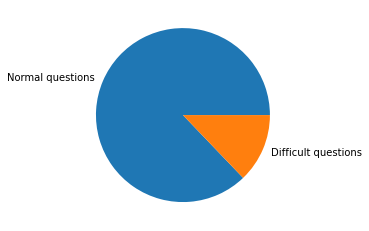

In [68]:
%matplotlib inline
array = df2.to_numpy() 
#Plots
#pie plot
X,Y = df2['difficulty'].value_counts()
P = [X,Y]
labels = ['Normal questions','Difficult questions']
plt.pie(P,labels = labels)
plt.show()

The plot below shows the number of answers submitted for each question (we just plotted for first 20 questions)

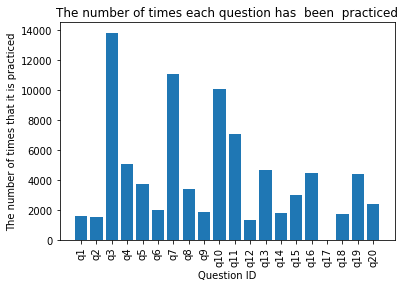

In [109]:
%matplotlib inline
x = array[:20,0]
y = array[:20,2]

#plt.hist(x, y)
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
plt.bar(x, y)

plt.title('The number of times each question has  been  practiced')
plt.xlabel('Question ID')
plt.ylabel('The number of times that it is practiced')
plt.xticks(rotation=90)
plt.show()


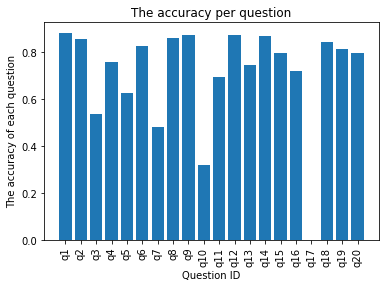

In [110]:
Q1 = array[:20,2]
Q2 = array[:20,3]
Q = np.divide(Q2, Q1, out=np.zeros_like(Q2), where=Q1!=0)
plt.bar(x, Q)
plt.title('The accuracy per question')
plt.xlabel('Question ID')
plt.ylabel('The accuracy of each question')
plt.xticks(rotation=90)
plt.show()

### Table 1:

### Question 1:
Who are the users?  
#### Overall practice volume and performance (e.g. # of questions answered, % of questions answered correctly):
The columns answers and correct_answers show the number of questions answered and questions anwered correctly, respectively. 
#### Learning activity (e.g. # lectures watched, # explanation read)
I counted the lectures whatched and auido listened (but if for example he/she watched a lecture more than one time, or paused and resumed it, I just counted it one time). 
#### Add three additional metrics you would like to compute to describe users
I added these three metrics to the user profile table:
For learning activity I also added audio listened.
I added a column with the name difficulty level 1 it means how many easy questions he/she answered correctly
difficulty level 2 means how many hard (or not easy) questions he/she has done correctly.
I also added accuracy percent that means percentage of his/her correct answers among all of the questions that he/she has answered 
#### Create a few plots to illustrate the information in the tables. Feel free to choose the type of plots you think is appropriate. 
I added the plots


In [46]:

import os



# All files
arr = sorted(os.listdir('KT4'))

L = len (arr)
# defining the headers of the table 1
header = ['user_id','answers','correct_answers','difficulty level 1','difficulty level 2','Learning activity','accuracy percent']

#load data

array = df_c.to_numpy() 

with open('Final.csv','w',encoding = 'UTF8',newline='') as f:
    writer = csv.writer(f)
        
    writer.writerow(header)
#correct array

C_a = []
C_ID = []
for k in range (len(df_c)):
    C_a.append(df_c.loc[k]['correct_answer'])
    C_ID.append(df_c.loc[k]['question_id'])
    
    

#main
#     10 >>> L


for j in range (20):
    
    diff1 = 0
    diff2 = 0
    df = pd.read_csv('KT4/'+arr[j])
    Arr = df.to_numpy() 
    res = ''
    q = ''
    Res = []
    Q_ID = []
    NUM = 0
#I want to add a new column to table 1 as learning activity, I define it as : the number of lectures they watched. 
#I am trying to wirte a code to not count repetetive lectures. 
#So, if the item id of the lecture is the same as the previous one, the code does NOT caunt it twice.

    learn = []
    L_ID = []
    #learning activity
    X0,Y0 = np.where(Arr == 'play_video')
    X1,Y1 = np.where(Arr == 'play_audio')
    X0 = np.concatenate((X0, X1), axis=0)
    CHeck = ''
    for B in range(len(X0)):
        
        if CHeck == Arr[X0[B]][2] :
            learn[len(learn)-1] = Arr[X0[B]][5]
        else :
            learn.append(Arr[X0[B]][5])
            L_ID.append(Arr[X0[B]][2])
        CHeck = Arr[X0[B]][2]
    
    #check respond
    
    X,Y = np.where(Arr == 'respond')
    CHeck = ''
    for B in range (len(X)) :
        
        if CHeck == Arr[X[B]][2] :
            Res[len(Res)-1] = Arr[X[B]][5]
        else :
            Res.append(Arr[X[B]][5])
            Q_ID.append(Arr[X[B]][2])
        CHeck = Arr[X[B]][2]
        

    
    
    #check answers
    num = 0
    for p in range (len(Q_ID)):
        v = C_ID.index(Q_ID[p])
        if Res[p] == C_a[v] :
            num += 1
            if df2.loc[p]['difficulty'] == 1 :
                diff1 += 1
            if df2.loc[p]['difficulty'] == 2 :
                diff2 += 1
            
  #Also, accuracy should be added for table 1 which is the percent of correct answers for each user.            
    # df_f.loc[0].iat[0]
    uid = arr[j]
    uid = uid.strip('.csv')
    data = [uid,len(Q_ID),num,diff1,diff2,len(learn),round((num/len(Q_ID))*100,2)]
    with open('Final.csv','a',encoding = 'UTF8',newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data)
    
    
    
    
            
        
    

In [47]:
table1 = pd.read_csv('Final.csv')

In [48]:
print(table1)

    user_id  answers  correct_answers  difficulty level 1  difficulty level 2  \
0        u1      501              349                 302                  17   
1       u10        1                1                   1                   0   
2      u100       22               11                  11                   0   
3     u1000      987              625                 545                  29   
4    u10004     1705             1221                1048                  66   
5   u100043      694              310                 271                  14   
6    u10005      507              363                 313                  16   
7     u1001        7                2                   2                   0   
8    u10010      124               81                  74                   2   
9    u10011      379              269                 239                  10   
10   u10013      131               73                  66                   2   
11   u10014      731        

In [28]:
table2 = pd.read_csv('Final2.csv')
#print(table2.iloc[0:200,:])
print(table2)

         Q_ID  Type  answer  C_answer  difficulty
0          q1   NaN    1598      1408         1.0
1          q2   NaN    1519      1294         1.0
2          q3   NaN   13835      7423         1.0
3          q4   NaN    5086      3836         1.0
4          q5   NaN    3750      2345         1.0
...       ...   ...     ...       ...         ...
13164  q13165   NaN     191       159         1.0
13165  q13166   NaN     176       159         1.0
13166  q13167   NaN     179       169         1.0
13167  q13168   NaN     173       158         1.0
13168  q13169   NaN     185       163         1.0

[13169 rows x 5 columns]


For 10 users we show the performance on different types of questions.

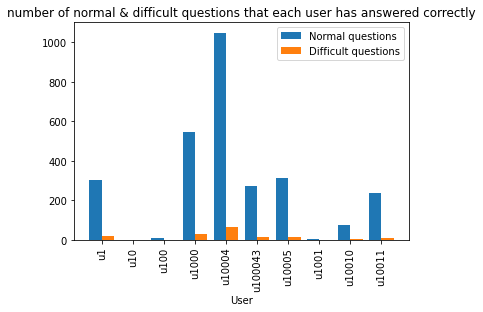

In [113]:
arr = os.listdir('KT4')
ID = []
dif1 = []
dif2 = []
for i in range (10):
    df = pd.read_csv('Final.csv')
    dif1.append(df.loc[i]['difficulty level 1'])
    dif2.append(df.loc[i]['difficulty level 2'])
    ID.append(df.loc[i]['user_id'])
    


X_axis = np.arange(len(ID))
plt.bar(X_axis - 0.2, dif1, 0.4, label = 'Normal questions')
plt.bar(X_axis + 0.2, dif2, 0.4, label = 'Difficult questions')
plt.xticks(X_axis, ID)
plt.xlabel("User")
plt.title("Number of normal & difficult questions that each user has answered correctly")
plt.legend()
plt.xticks(rotation=90)
plt.show()

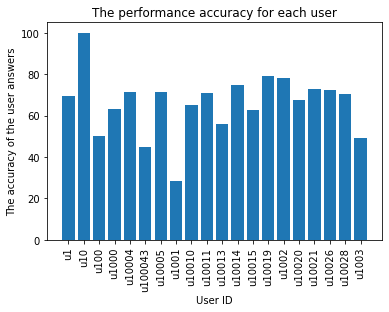

In [118]:
array1 = table1.to_numpy()
x0 = array1[:20,0]
x1 = array1[:20,6]


plt.bar(x0, x1)
plt.title('The performance accuracy for each user')
plt.xlabel('User ID')
plt.ylabel('The accuracy of the user answers')
plt.xticks(rotation=90)
plt.show()

Now we have table 1 (user profile) and table 2 (questions profile).

### Question 3:
#### Design a modified metric of “accuracy” to fairly describe users’ ability by taking into account the difficulty level as derived from Table 2. Describe the procedure to compute the metrics.  Be sure to be specific so that interns can use your pseudo code to implement the metrics without much trouble. 
I have done this in the previous cells. For each user as we mentioned before "accuracy percent" is defined, and it means "the number of questions answered correctly/the number of questions answered" which shows user's ability in answering the questions. We also had defined the difficulty level for each question in the section of table 2 (Question 2). For a modified accuracy regarding difficulty level of the questions, I can also calculate "the percentage of difficult questions answered correctly= the number of difficult questions answered correctly/ the number of questions answered correctly". i will name it percentage of difficult questions answered and the column name is percent_difficlut_questions_correctly.
#### implement the proposed metrics and plot a histogram of the metrics across all users (or subset of users of your choices). 
I have applied the first proposed metric for all of the 500 users ( for lack of storage, I just considered 500 of the users). For the second I applied it for 20 users as below. Also, the plot is added. 


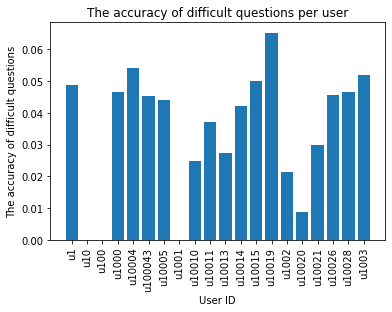

In [115]:
array1 = table1.to_numpy()
X0 = array1[:20,0]
X1 = array1[:20,2]
X2 = array1[:20,4]
accuracy_difficult_Qs = np.divide(X2, X1, out=np.zeros_like(X2), where=X1!=0)

plt.bar(X0, accuracy_difficult_Qs)
plt.title('The accuracy of difficult questions per user')
plt.xlabel('User ID')
plt.ylabel('The accuracy of difficult questions')
plt.xticks(rotation=90)
plt.show()

### Question 4:
#### Pick a user with a reasonable amount of activity (you will define the “reasonableness” and specify the selection criteria) and create a dashboard that consists of a series of plots to tell a story of this user’s activity patterns. For inspiration, you may look at the user dashboard for fitness tracker such as Fitbit. 


User Data :
user_id               u100043
answers                   694
correct_answers           310
difficulty level 1        271
difficulty level 2         14
Learning activity         351
accuracy percent        44.67
Name: 5, dtype: object


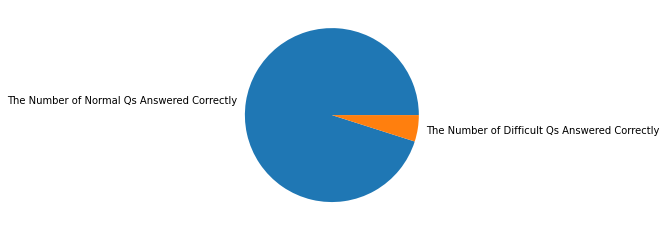

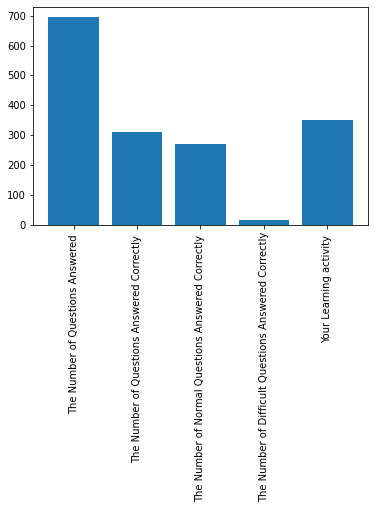

In [117]:
#sample user 
# USer 7
import pandas as pd
import matplotlib.pyplot as plt

df7 = pd.read_csv('KT4/u7.csv')
df = pd.read_csv('Final.csv')
print('User Data :')
print(df.loc[5])

#pie plot
P = [df.loc[5][3],df.loc[5][4]]
labels = ['The Number of Normal Qs Answered Correctly','The Number of Difficult Qs Answered Correctly']
plt.pie(P,labels = labels)
plt.show()

#bar plot

labels = ['The Number of Questions Answered ','The Number of Questions Answered Correctly ','The Number of Normal Questions Answered Correctly ','The Number of Difficult Questions Answered Correctly','Your Learning activity ']
x = df.loc[5][1:6]
plt.bar(labels,x)
plt.xticks(rotation=90)
plt.show()


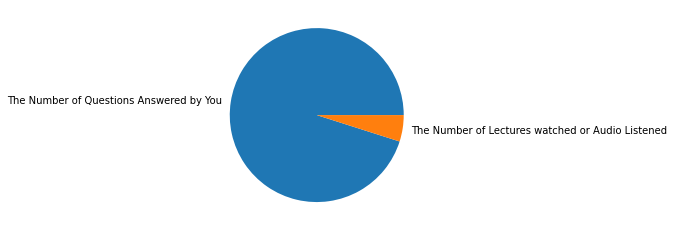

In [122]:


#pie plot
P2 = [df.loc[5][1],df.loc[5][5]]
labels = ['The Number of Questions Answered by You','The Number of Lectures watched or Audio Listened']
plt.pie(P,labels = labels)
plt.show()



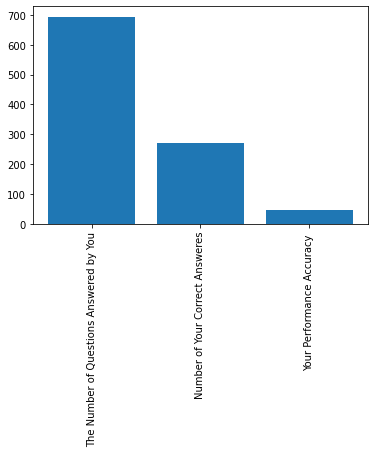

In [126]:
#bar plot

labels = ['The Number of Questions Answered by You','Number of Your Correct Answeres' ,'Your Performance Accuracy ']
x2 = [df.loc[5][1], df.loc[5][3], df.loc[5][6]]
plt.bar(labels,x2)
plt.xticks(rotation=90)
plt.show()

In [120]:
print(df.loc[5])

user_id               u100043
answers                   694
correct_answers           310
difficulty level 1        271
difficulty level 2         14
Learning activity         351
accuracy percent        44.67
Name: 5, dtype: object


### Question 5:
#### Propose two tasks for your interns to work on. The first task is of unsupervised/descriptive type and a second one is of supervised/predictive task. Please provide clear specification of the tasks so that your interns can start to work right away. You should try to propose tasks that are not attempted in the existing work with this dataset. 


ask the intern to do a clustering on table 1, to have the users in different clusters. Then we can analyze their behaviour in each cluster. For this I suggest K-means or the other clustering methods. Also, it is good to do the clustering based on different features, and compare the results. I do expect the evaluation of her/his modelThe next task can be predicting the user's learning activity based on the other features that are more about the questions they have answered. For doing this supervised task, the intern has to pay enough attention to the correlation of the features. For example, obviously the accuracy column is correlated with the number of questions answered. The intern has to ignore some correlated features that do not contribute to the info, or make a new feature containing the info of the correlated features. Then, predict the learning activity using some regression models. And evaluate her/his model with the hold-out-dataset  method .